## Overlapping Distribution Method

In `HW5-2-MCMC.ipynb`, we can see that we consider two independent N-particle systems: one containing N particles following the Lennard-Jones potential, denoted as S1, and the other containing N-1 particles following the Lennard-Jones potential plus one ideal gas particle, denoted as S0. The free energy difference between these two systems, ∆F = F1 - F0, is the quantity we want to calculate, which corresponds to $μ_{ex}$. Now, we will introduce a general method to compute the free energy difference between two systems called the **Overlapping Distribution method**.

Still let $\Delta E = E_{1} - E_{0}$ denote the potential energy difference. We will construct a histogram of ∆E by performing Monte Carlo sampling on both systems.
$$
p_1(\Delta E) = \frac{1}{Z_1} \int ds^N e^{-\beta E_1} \delta(E_1 - E_0 - \Delta E)
$$
Note that the Dirac delta function, $\delta(E_{1} - E_{0} - \Delta E)$, allows us to replace $E_{1}$ with $E_{0} + \Delta E$ in the Boltzmann factor $exp(-\beta E_{1})$. Therefore, we have:
$$
p_{1}(\Delta E) = \frac{1}{Z_{1}} \int ds^N e^{-\beta (E_{0} + \Delta E)}\delta(E_{1} - E_{0} - \Delta E) = \frac{Z_{0}}{Z_{1}}\exp(-\beta \Delta E) p_{0}(\Delta E)
$$
Taking the logarithm of both sides of the equation and noting that $\Delta F = -\tau log(Z_{1}/Z_{0})$, we have:
$$
log(p_{1}(\Delta E)) = \beta(\Delta F-\Delta E) + log(p_{0}(\Delta E)) 
$$
Define:
$$
f_{0}(\Delta E) = log(p_{0}(\Delta E)) + \frac{\beta \Delta E}{2}
$$
$$
f_{1}(\Delta E) = log(p_{1}(\Delta E)) - \frac{\beta \Delta E}{2}
$$
Then, we have:
$$
f_{1}(\Delta E) = f_{0}(\Delta E) + \beta \Delta F
$$


Assuming that System 1 consists of $N$ particles following the Lennard-Jones potential, and System 0 consists of $N-1$ particles following the Lennard-Jones potential plus one ideal gas particle. By performing Monte Carlo simulations on both systems, we can obtain distributions of $\Delta E$ in the range where $f_{1}(\Delta E)$ and $f_{0}(\Delta E)$ are non-zero. By fitting polynomial functions to these distributions, the difference between the constant terms of the fitted functions is $βμ_{ex}$, which is the quantity we are seeking.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.patches as pch

In [50]:
x1=np.zeros((27,20000))
y1=np.zeros((27,20000))
z1=np.zeros((27,20000))
x0=np.zeros((26,20000))
y0=np.zeros((26,20000))
z0=np.zeros((26,20000))


In [51]:
location=np.array([[2.5,2.5,2.5],
                 [1.5,2.5,2.5],
                 [3.5,2.5,2.5],
                 [2.5,1.5,2.5],
                 [2.5,3.5,2.5],
                 [2.5,2.5,1.5],
                 [2.5,2.5,3.5],
                 [3.5,3.5,2.5],
                 [3.5,1.5,2.5],
                 [1.5,3.5,2.5],
                 [1.5,1.5,2.5],
                 [3.5,2.5,3.5],
                 [3.5,2.5,1.5],
                 [1.5,2.5,3.5],
                 [1.5,2.5,1.5],
                 [2.5,3.5,3.5],
                 [2.5,3.5,1.5],
                 [2.5,1.5,3.5],
                 [2.5,1.5,1.5],
                 [3.5,3.5,3.5],
                 [3.5,3.5,1.5],
                 [3.5,1.5,3.5],
                 [1.5,3.5,3.5],
                 [1.5,1.5,3.5],
                 [1.5,3.5,1.5],
                 [3.5,1.5,1.5],
                 [1.5,1.5,1.5],])

In [52]:
for i in range(27):
    x1[i][0]=location[i][0]
    y1[i][0]=location[i][1]
    z1[i][0]=location[i][2]
for i in range(26):
    x0[i][0]=location[i][0]
    y0[i][0]=location[i][1]
    z0[i][0]=location[i][2]

In [53]:
def compare(xi,xj):#计算最近镜像
    if abs(xi-xj)<=abs(xi-xj+L):
        if abs(xi-xj)<=abs(xi-xj-L):
            px=0
            dx=abs(xi-xj)
        else:
            px=+1
            dx=abs(xi-xj-L)
    else:
        if abs(xi-xj+L)<=abs(xi-xj-L):
            px=-1
            dx=abs(xi-xj+L)
        else:
            px=+1
            dx=abs(xi-xj-L)
    return px,dx

In [54]:
def cal_r(xi,yi,zi,xj,yj,zj):
    px,dx=compare(xi,xj)
    py,dy=compare(yi,yj)
    pz,dz=compare(zi,zj)
    r=math.sqrt(dx*dx+dy*dy+dz*dz)
    return r,px,py,pz#px,py,pz表示镜像的位置   

In [55]:
import random
L=5
rc=2.5
temperature=5

In [56]:
up1=np.zeros(20000)

In [57]:
for i in range(1):
    for j in range(27):
        for k in range(27):
            if j==k:
                continue
            rjk,px,py,pz=cal_r(x1[j][i],y1[j][i],z1[j][i],x1[k][i],y1[k][i],z1[k][i])
            up1[i]+=2*(math.pow(rjk,-12)-math.pow(rjk,-6))

In [58]:
for i in range(19999):
    #print(i)
    temp1=(random.random()-0.5)*L*2
    temp2=(random.random()-0.5)*L*2
    temp3=(random.random()-0.5)*L*2
    jt=random.randint(0,26)#被选中的粒子序号
    for j in range(27):
        x1[j][i+1]=x1[j][i]
        y1[j][i+1]=y1[j][i]
        z1[j][i+1]=z1[j][i]
    x1[jt][i+1]=(x1[jt][i]+temp1)%L
    y1[jt][i+1]=(y1[jt][i]+temp2)%L
    z1[jt][i+1]=(z1[jt][i]+temp3)%L
    
    for j in range(27):
        for k in range(27):
            if j==k:
                continue
            rjk,px,py,pz=cal_r(x1[j][i+1],y1[j][i+1],z1[j][i+1],x1[k][i+1],y1[k][i+1],z1[k][i+1])
            up1[i+1]+=2*(math.pow(rjk,-12)-math.pow(rjk,-6))
    if(up1[i+1]>up1[i]):
        delta_E=up1[i+1]-up1[i]
        q=random.random()
        if(q>math.exp(-delta_E/temperature)):
            x1[jt][i+1]=x1[jt][i]
            y1[jt][i+1]=y1[jt][i]
            z1[jt][i+1]=z1[jt][i]
            up1[i+1]=up1[i]
    

In [61]:
up0=np.zeros(20000)
for i in range(1):
    for j in range(26):
        for k in range(26):
            if j==k:
                continue
            rjk,px,py,pz=cal_r(x0[j][i],y0[j][i],z0[j][i],x0[k][i],y0[k][i],z0[k][i])
            up0[i]+=2*(math.pow(rjk,-12)-math.pow(rjk,-6))

In [62]:
up0[0]

-39.25010569974872

In [63]:
for i in range(19999):
    #print(i)
    temp1=(random.random()-0.5)*L*2
    temp2=(random.random()-0.5)*L*2
    temp3=(random.random()-0.5)*L*2
    jt=random.randint(0,25)#被选中的粒子序号
    for j in range(26):
        x0[j][i+1]=x0[j][i]
        y0[j][i+1]=y0[j][i]
        z0[j][i+1]=z0[j][i]
    x0[jt][i+1]=(x0[jt][i]+temp1)%L
    y0[jt][i+1]=(y0[jt][i]+temp2)%L
    z0[jt][i+1]=(z0[jt][i]+temp3)%L
    
    for j in range(26):
        for k in range(26):
            if j==k:
                continue
            rjk,px,py,pz=cal_r(x0[j][i+1],y0[j][i+1],z0[j][i+1],x0[k][i+1],y0[k][i+1],z0[k][i+1])
            up0[i+1]+=2*(math.pow(rjk,-12)-math.pow(rjk,-6))
    if(up0[i+1]>up0[i]):
        delta_E=up0[i+1]-up0[i]
        q=random.random()
        if(q>math.exp(-delta_E/temperature)):
            x0[jt][i+1]=x0[jt][i]
            y0[jt][i+1]=y0[jt][i]
            z0[jt][i+1]=z0[jt][i]
            up0[i+1]=up0[i]
    

In [33]:
round(-0.6)

-1

In [70]:
p1=np.zeros(200)
p0=np.zeros(200)
for i in range(10000,20000):
    j_remove=random.randint(0,26)
    up_remove=0
    for j in range(27):
        if j==j_remove:
            continue
        rjk,px,py,pz=cal_r(x1[j_remove][i],y1[j_remove][i],z1[j_remove][i],x1[j][i],y1[j][i],z1[j][i])
        up_remove+=4*(math.pow(rjk,-12)-math.pow(rjk,-6))
    k1=round(99+5*up_remove)
    if k1<200:
        p1[k1]+=1
    temp1=random.random()*L
    temp2=random.random()*L
    temp3=random.random()*L
    up_insert=0
    for j in range(26):
        rjk,px,py,pz=cal_r(temp1,temp2,temp3,x0[j][i],y0[j][i],z0[j][i])
        up_insert+=4*(math.pow(rjk,-12)-math.pow(rjk,-6))
    k0=round(99+5*up_insert)
    if k0<200:
        p0[k0]+=1


In [71]:
t=np.linspace(-20,20,200)

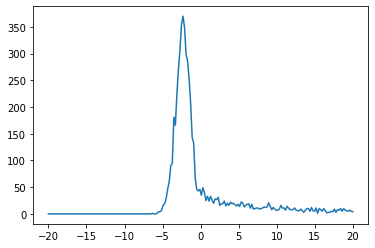

In [73]:
plt.plot(t,p0)

In [84]:
f1=np.zeros(200)
f0=np.zeros(200)
for k in range(200):
    delta_up=-20+k/5
    if p1[k]>0:
        f1[k]=math.log(p1[k]/10000)+(delta_up)/(temperature*2)
    else:
        f1[k]=math.log(1/10000)+(delta_up)/(temperature*2)    
    if p0[k]>0:
        f0[k]=math.log(p0[k]/10000)-(delta_up)/(temperature*2)
    else:
        f0[k]=math.log(1/10000)-(delta_up)/(temperature*2)
            

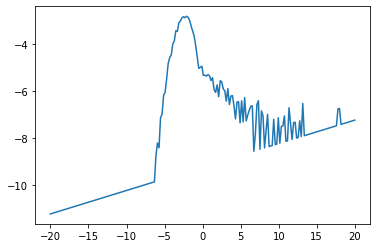

In [85]:
plt.plot(t,f1)

The simulation results are shown in the figure, and it can be observed that in the overlapping region, both the Widom method and the Overlapping Distribution method yield almost identical results. According to the calculations, the chemical potential obtained from the Overlapping Distribution method is approximately 1.61.

Text(0, 0.5, 'βμ_ex')

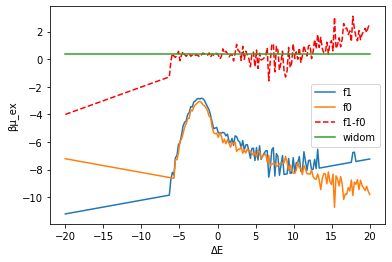

In [105]:
a=plt.plot(t,f1,label='f1')
b=plt.plot(t,f0,label='f0')
c=plt.plot(t,f1-f0,'r--',label='f1-f0')
d=plt.plot(t,w,label='widom')
plt.legend(loc='best')
plt.xlabel('ΔE')
plt.ylabel('βμ_ex')

In [87]:
widom_cp=1.8683857758632152/5

In [88]:
widom_cp

0.37367715517264305

In [89]:
w=np.zeros(200)
for i in range(200):
    w[i]=widom_cp

In [106]:
overlapping_chemistry_potential=0
for k in range(75,110):
    overlapping_chemistry_potential+=f1[k]-f0[k]
overlapping_chemistry_potential=(overlapping_chemistry_potential)/35*temperature

In [107]:
overlapping_chemistry_potential

1.6102898325573363